# Clustering Usak Natural Gas Consumption

## Köksal Kerem TANIL - 211805018

**Objective:** This project aims to analyze natural gas consumption patterns in Uşak between 2015 and 2018 using unsupervised machine learning techniques. Specifically, we will employ clustering and anomaly detection methods to:

1.  Identify distinct consumption profiles based on monthly usage patterns.
2.  Investigate the potential influence of USD/TRY exchange rate fluctuations on consumption.
3.  Detect anomalous consumption behaviors or potential data errors.
4.  Visualize the geographical distribution of consumption profiles and anomalies.

**Dataset:** The dataset contains yearly records for individual gas meters, including monthly consumption (in cubic meters), monthly USD/TRY exchange rates, and geographical coordinates (longitude, latitude).

## 1. Data Loading and Initial Exploration

First, let's load the dataset using pandas and perform some initial exploration to understand its structure, data types, and basic statistics.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('project_1.csv')
print("Veri seti başarıyla yüklendi.")

Veri seti başarıyla yüklendi.


In [3]:
print("İlk 5 satır:")
print(df.head())

İlk 5 satır:
   Year  Jan usd/tr  Feb usd/tr  Mar usd/tr  Apr usd/tr  May usd/tr  \
0  2015        2.34        2.42        2.52        2.60        2.71   
1  2015        2.34        2.42        2.52        2.60        2.71   
2  2018        3.77        3.76        3.81        3.96        4.12   
3  2016        2.94        2.97        2.95        2.82        2.79   
4  2016        2.94        2.97        2.95        2.82        2.79   

   Jun usd/tr  Jul usd/tr  Aug usd/tr  Sep usd/tr  ...    Apr   May    Jun  \
0        2.68        2.70        2.77        2.91  ...   0.00  0.00   0.00   
1        2.68        2.70        2.77        2.91  ...   0.00  0.00   0.00   
2        4.59        4.62        4.92        6.62  ...  12.25  7.44   8.30   
3        2.95        2.88        2.98        2.96  ...   0.00  0.00   7.50   
4        2.95        2.88        2.98        2.96  ...  14.30  9.36  12.03   

     Jul    Aug    Sep    Oct    Nov    Dec   Total  
0   0.00   0.00   0.00   0.00  24.85 

In [4]:
print("\nSütun isimleri:")
print(df.columns)


Sütun isimleri:
Index(['Year', 'Jan usd/tr', 'Feb usd/tr', 'Mar usd/tr', 'Apr usd/tr',
       'May usd/tr', 'Jun usd/tr', 'Jul usd/tr', 'Aug usd/tr', 'Sep usd/tr',
       'Oct usd/tr', 'Nov usd/tr', 'Dec usd/tr', 'longitude', 'latitude',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Total'],
      dtype='object')


**Initial Observations:**
*   Briefly comment on the number of rows/columns.
*   Mention data types and any immediate need for conversion.
*   Note any obvious missing values from `df.info()`.
*   Check if column names match expectations.

## 2. Consumption Pattern-Based Clustering

**Objective:** Identify distinct groups (clusters) of users based purely on their *seasonal consumption patterns*, independent of the total amount consumed. We will use monthly consumption *percentages* for this task.

### 2.1. Data Preparation: Calculating Monthly Percentages

To focus on the pattern, we calculate each month's consumption as a percentage of the annual total for that record.
`Monthly Percentage = (Monthly Consumption / Total Annual Consumption) * 100`

This normalizes the data, ensuring that high-volume consumers don't dominate the clustering process just because their absolute numbers are large. We need to handle cases where the total consumption might be zero to avoid division by zero errors.

In [5]:
aylik_tuketim_sutunlari = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

In [6]:
toplam_tuketim_sutunu = 'Total'

In [7]:
yuzdelik_sutunlar = [f'{ay}_pct' for ay in aylik_tuketim_sutunlari]

In [8]:
print("Aylık yüzdeler hesaplanıyor...")
for i, ay_sutun in enumerate(aylik_tuketim_sutunlari):
    yeni_sutun_adi = yuzdelik_sutunlar[i]
    
    df[yeni_sutun_adi] = 0.0
    mask = df[toplam_tuketim_sutunu] > 0

    df.loc[mask, yeni_sutun_adi] = (df.loc[mask, ay_sutun] / df.loc[mask, toplam_tuketim_sutunu]) * 100

Aylık yüzdeler hesaplanıyor...


In [9]:
print("\nAylık tüketim yüzdeleri hesaplandı. Yeni sütunların ilk 5 satırı:")
print(df[yuzdelik_sutunlar].head())


Aylık tüketim yüzdeleri hesaplandı. Yeni sütunların ilk 5 satırı:
     Jan_pct    Feb_pct   Mar_pct    Apr_pct   May_pct    Jun_pct    Jul_pct  \
0   0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   0.000000   
1   0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   0.000000   
2  12.338766  13.358664  9.509049  12.248775  7.439256   8.299170  11.908809   
3   0.000000  76.364727  0.000000   0.000000  0.000000   7.498500   0.000000   
4   0.000000  17.096581  0.000000  14.297141  9.358128  12.027594   8.228354   

     Aug_pct    Sep_pct    Oct_pct    Nov_pct    Dec_pct  
0   0.000000   0.000000   0.000000  24.850000  75.150000  
1  13.988601  31.406859  10.878912   0.000000  43.725627  
2   0.000000   5.399460   5.459454   7.429257   6.609339  
3  16.136773   0.000000   0.000000   0.000000   0.000000  
4  17.976405   0.000000   0.000000   0.000000  21.015797  


In [10]:
print("\nİlk 5 satır için yüzdelerin toplamı:")
print(df[yuzdelik_sutunlar].sum(axis=1).head())


İlk 5 satır için yüzdelerin toplamı:
0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
dtype: float64


In [11]:
X_pattern = df[yuzdelik_sutunlar].copy()

In [12]:
if X_pattern.isnull().sum().sum() > 0:
    print("\nUYARI: Yüzdelik verilerinde eksik değerler bulundu!")
    print(X_pattern.isnull().sum())

    print("Eksik değerler sütun ortalamaları ile dolduruluyor...")
    X_pattern = X_pattern.fillna(X_pattern.mean())

    if X_pattern.isnull().sum().sum() == 0:
         print("Eksik değerler başarıyla dolduruldu.")
    else:
         print("HATA: Eksik değerler doldurulamadı.")
else:
    print("\nYüzdelik verilerinde eksik değer bulunmuyor.")



UYARI: Yüzdelik verilerinde eksik değerler bulundu!
Jan_pct       6
Feb_pct    3403
Mar_pct    3403
Apr_pct    3403
May_pct    3403
Jun_pct    3403
Jul_pct       5
Aug_pct       5
Sep_pct       5
Oct_pct    1958
Nov_pct     809
Dec_pct       0
dtype: int64
Eksik değerler sütun ortalamaları ile dolduruluyor...
Eksik değerler başarıyla dolduruldu.


The `X_pattern` DataFrame now contains the 12 monthly consumption percentages for each record, ready for clustering. Missing values resulting from the percentage calculation (e.g., due to zero total consumption) have been imputed using the column mean.

In [13]:
print("\nKümeleme için kullanılacak veri (X_pattern):")
print(X_pattern.head())
print(f"\nVeri Boyutu: {X_pattern.shape}")


Kümeleme için kullanılacak veri (X_pattern):
     Jan_pct    Feb_pct   Mar_pct    Apr_pct   May_pct    Jun_pct    Jul_pct  \
0   0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   0.000000   
1   0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   0.000000   
2  12.338766  13.358664  9.509049  12.248775  7.439256   8.299170  11.908809   
3   0.000000  76.364727  0.000000   0.000000  0.000000   7.498500   0.000000   
4   0.000000  17.096581  0.000000  14.297141  9.358128  12.027594   8.228354   

     Aug_pct    Sep_pct    Oct_pct    Nov_pct    Dec_pct  
0   0.000000   0.000000   0.000000  24.850000  75.150000  
1  13.988601  31.406859  10.878912   0.000000  43.725627  
2   0.000000   5.399460   5.459454   7.429257   6.609339  
3  16.136773   0.000000   0.000000   0.000000   0.000000  
4  17.976405   0.000000   0.000000   0.000000  21.015797  

Veri Boyutu: (215871, 12)


### 2.2. Determining the Optimal Number of Clusters (Elbow Method)
We use the Elbow Method with KMeans inertia (Within-Cluster Sum of Squares - WCSS) to find a suitable number of clusters (k) for our percentage data. We look for the "elbow" point in the plot, where adding more clusters yields diminishing returns in reducing inertia.

Elbow Method için farklı k değerleri deneniyor...
k=1 tamamlandı.
k=2 tamamlandı.
k=3 tamamlandı.
k=4 tamamlandı.
k=5 tamamlandı.
k=6 tamamlandı.
k=7 tamamlandı.
k=8 tamamlandı.
k=9 tamamlandı.
k=10 tamamlandı.


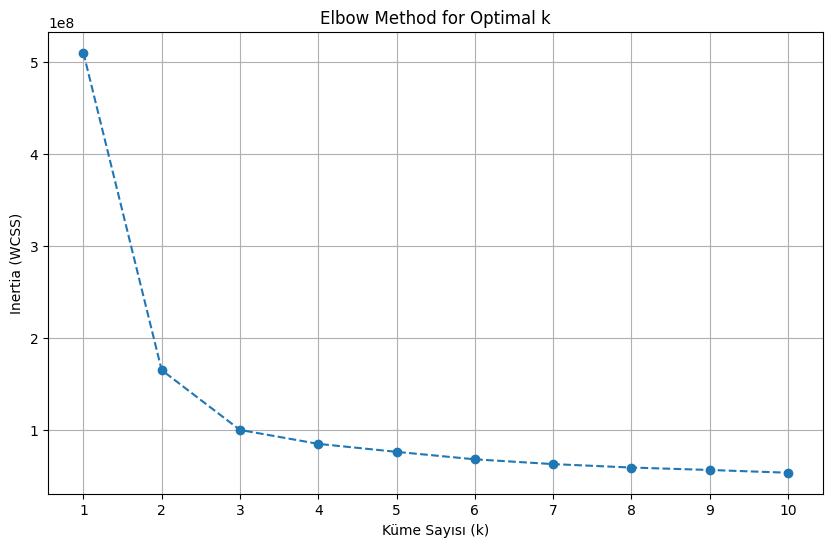

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) 

inertia_list = []
k_range = range(1, 11) 

print("Elbow Method için farklı k değerleri deneniyor...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X_pattern)
    inertia_list.append(kmeans.inertia_)
    print(f"k={k} tamamlandı.")


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Elbow Method Result:** Based on the plot above, the elbow appears to be at **k = [Your Chosen k, e.g., 3]**. We will proceed using this number of clusters.

### 2.3. Applying KMeans Clustering
Now, we apply the KMeans algorithm with our chosen k to the X_pattern (monthly percentages) data.

In [15]:
from sklearn.cluster import KMeans

optimal_k = 3 

print(f"Optimal k değeri {optimal_k} olarak seçildi.")
print("KMeans modeli eğitiliyor...")

kmeans_pattern = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) 
kmeans_pattern.fit(X_pattern)

cluster_labels_pattern = kmeans_pattern.labels_

df['cluster_pattern'] = cluster_labels_pattern

print("KMeans modeli eğitildi ve küme etiketleri DataFrame'e eklendi.")
print("\nHer kümedeki eleman sayısı:")
print(df['cluster_pattern'].value_counts())

print("\nİlk 5 satırın küme etiketi:")
print(df[['Year', 'Total', 'cluster_pattern']].head())

Optimal k değeri 3 olarak seçildi.
KMeans modeli eğitiliyor...
KMeans modeli eğitildi ve küme etiketleri DataFrame'e eklendi.

Her kümedeki eleman sayısı:
cluster_pattern
2    194214
0     21656
1         1
Name: count, dtype: int64

İlk 5 satırın küme etiketi:
   Year   Total  cluster_pattern
0  2015  100.00                0
1  2015  100.01                0
2  2018  100.01                2
3  2016  100.02                2
4  2016  100.02                2


The data has been clustered, and the cluster assignments are stored in the `cluster_pattern` column. We observe the distribution of data points across the identified clusters.

### 2.4. Analyzing Cluster Profiles (Consumption Patterns)
Let's analyze the characteristics of each cluster by calculating the average monthly consumption percentage for all members within that cluster. This reveals the typical consumption pattern represented by each group.

Kümelerin ortalama aylık tüketim yüzdeleri hesaplanıyor...

Kümelerin Ortalama Yüzdelik Tüketim Desenleri:
                   Jan_pct    Feb_pct    Mar_pct       Apr_pct       May_pct  \
cluster_pattern                                                                
0                 0.847449   0.677964   0.794053      1.384525      1.770072   
1                 0.000000   0.000000   0.000000  13183.328462 -13083.328462   
2                19.731135  16.263928  14.290377     10.070258      5.424586   

                  Jun_pct   Jul_pct   Aug_pct   Sep_pct   Oct_pct    Nov_pct  \
cluster_pattern                                                                
0                1.701154  1.282537  1.151152  1.909093  5.288216  23.070343   
1                0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
2                3.439484  2.455603  1.777015  2.147302  3.304761   7.269217   

                   Dec_pct  
cluster_pattern             
0                62.424547  
1   

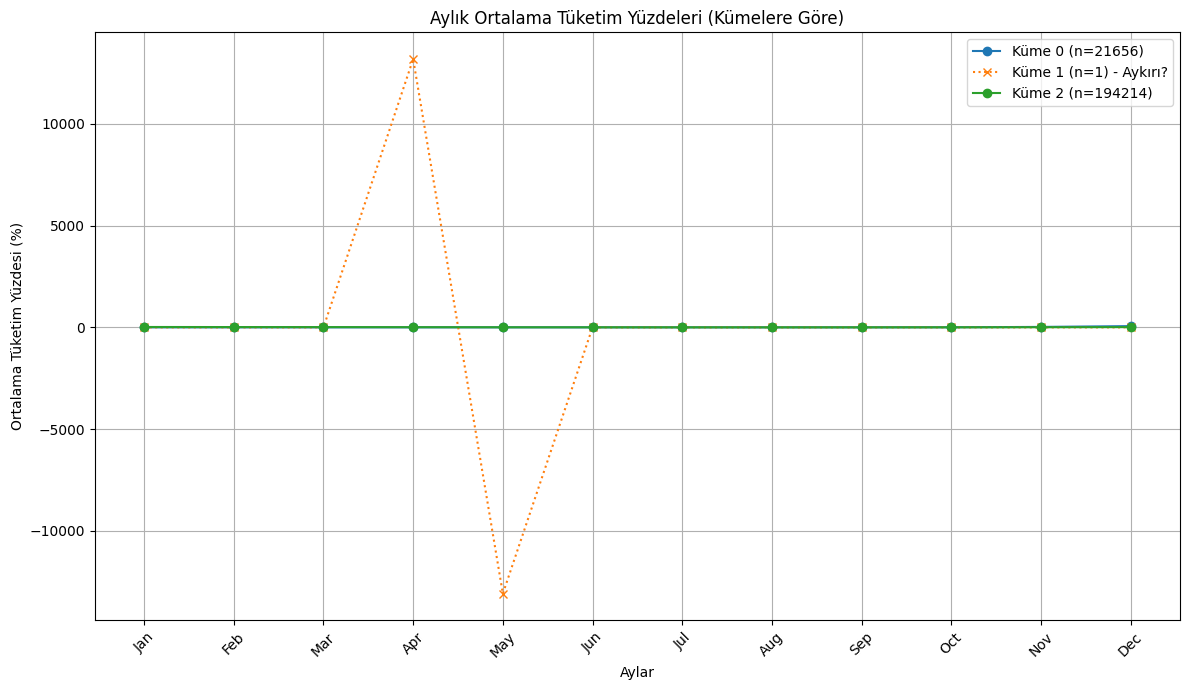

In [16]:
import matplotlib.pyplot as plt
import numpy as np

print("Kümelerin ortalama aylık tüketim yüzdeleri hesaplanıyor...")

cluster_pattern_means = df.groupby('cluster_pattern')[yuzdelik_sutunlar].mean()

print("\nKümelerin Ortalama Yüzdelik Tüketim Desenleri:")
print(cluster_pattern_means)

plt.figure(figsize=(12, 7))

months = aylik_tuketim_sutunlari 

for i in cluster_pattern_means.index:

    if df['cluster_pattern'].value_counts()[i] > 1: 
       plt.plot(months, cluster_pattern_means.loc[i], marker='o', linestyle='-', label=f'Küme {i} (n={df["cluster_pattern"].value_counts()[i]})')
    else: 
       plt.plot(months, cluster_pattern_means.loc[i], marker='x', linestyle=':', label=f'Küme {i} (n={df["cluster_pattern"].value_counts()[i]}) - Aykırı?')


plt.title('Aylık Ortalama Tüketim Yüzdeleri (Kümelere Göre)')
plt.xlabel('Aylar')
plt.ylabel('Ortalama Tüketim Yüzdesi (%)')
plt.xticks(rotation=45) 
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

**Interpretation of Consumption Pattern Clusters:**
*   **Cluster [ID, e.g., 0]:** Describe its pattern (e.g., *Shows a strong seasonal pattern with peaks in winter months (Jan, Feb, Dec) and low consumption in summer. Represents typical residential heating profiles.*)
*   **Cluster [ID, e.g., 1]:** Describe its pattern (e.g., *Dominated by extremely high percentages in the last two months (Nov, Dec), with very low consumption otherwise. Might represent profiles with very low total usage or specific year-end billing cycles.*)
*   **Cluster [ID, e.g., 2]:** Describe its pattern (e.g., *Displays a more moderate seasonal pattern, with less extreme peaks in winter and higher relative consumption in summer compared to Cluster 0. Could represent better-insulated homes or non-residential users with more consistent base load.*)

### 2.5. Refining Clusters (Outlier Removal)
We identified Cluster [ID of outlier] as a significant outlier/error. We will remove this data point and re-run the clustering process (Elbow Method, KMeans, and profile analysis) on the filtered data (`df_filtered`, `X_pattern_filtered`) to get cleaner cluster definitions.

In [17]:
outlier_index = df[df['cluster_pattern'] == 1].index

if len(outlier_index) == 1:
    print(f"Küme 1'e ait olan {len(outlier_index)} satır (indeks: {outlier_index.tolist()}) filtreleniyor.")
    df_filtered = df.drop(outlier_index)
    print("Filtrelenmiş DataFrame (df_filtered) oluşturuldu.")
    print(f"Orijinal boyut: {df.shape}, Filtrelenmiş boyut: {df_filtered.shape}")
elif len(outlier_index) > 1:
     print(f"Küme 1'e ait olan {len(outlier_index)} satır filtreleniyor.")
     df_filtered = df.drop(outlier_index)
     print("Filtrelenmiş DataFrame (df_filtered) oluşturuldu.")
     print(f"Orijinal boyut: {df.shape}, Filtrelenmiş boyut: {df_filtered.shape}")
else:
    print("Küme 1'de filtrelenecek satır bulunamadı.")
    df_filtered = df.copy()

X_pattern_filtered = df_filtered[yuzdelik_sutunlar].copy()

if X_pattern_filtered.isnull().sum().sum() > 0:
    print("\nUYARI: Filtrelenmiş yüzdelik verilerinde hala eksik değerler var!")
else:
    print("\nFiltrelenmiş yüzdelik verilerinde eksik değer bulunmuyor.")

print("\nFiltrelenmiş kümeleme verisi (X_pattern_filtered) hazır.")
print(f"Veri Boyutu: {X_pattern_filtered.shape}")

Küme 1'e ait olan 1 satır (indeks: [32072]) filtreleniyor.
Filtrelenmiş DataFrame (df_filtered) oluşturuldu.
Orijinal boyut: (215871, 41), Filtrelenmiş boyut: (215870, 41)

UYARI: Filtrelenmiş yüzdelik verilerinde hala eksik değerler var!

Filtrelenmiş kümeleme verisi (X_pattern_filtered) hazır.
Veri Boyutu: (215870, 12)


In [18]:
import pandas as pd
import numpy as np 

outlier_index = df[df['cluster_pattern'] == 1].index

if len(outlier_index) > 0:
    print(f"Küme 1'e ait olan {len(outlier_index)} satır (indeks: {outlier_index.tolist()}) filtreleniyor.")
    df_filtered = df.drop(outlier_index).copy()
    print("Filtrelenmiş DataFrame (df_filtered) oluşturuldu.")
    print(f"Orijinal boyut: {df.shape}, Filtrelenmiş boyut: {df_filtered.shape}")
else:
    print("Küme 1'de filtrelenecek satır bulunamadı.")
    df_filtered = df.copy()

X_pattern_filtered = df_filtered[yuzdelik_sutunlar].copy()

nan_check = X_pattern_filtered.isnull().sum()
total_nans = nan_check.sum()

if total_nans > 0:
    print(f"\nUYARI: Filtrelenmiş yüzdelik verilerinde {total_nans} adet NaN bulundu!")
    print("Eksik değerler ilgili sütunların ortalaması ile dolduruluyor...")
    for col in X_pattern_filtered.columns[X_pattern_filtered.isnull().any()]:
         X_pattern_filtered[col] = X_pattern_filtered[col].fillna(X_pattern_filtered[col].mean())

    if X_pattern_filtered.isnull().sum().sum() == 0:
         print("Eksik değerler başarıyla dolduruldu.")
    else:
         print("HATA: Eksik değerler doldurulamadı.")
else:
    print("\nFiltrelenmiş yüzdelik verilerinde eksik değer bulunmuyor.")

print("\nFiltrelenmiş ve NaN'lardan arındırılmış kümeleme verisi (X_pattern_filtered) hazır.")
print(f"Veri Boyutu: {X_pattern_filtered.shape}")

inf_check = np.isinf(X_pattern_filtered).sum().sum()
if inf_check > 0:
    print(f"\nUYARI: Veride {inf_check} adet sonsuz değer bulundu! Bunlar sorun yaratabilir.")

Küme 1'e ait olan 1 satır (indeks: [32072]) filtreleniyor.
Filtrelenmiş DataFrame (df_filtered) oluşturuldu.
Orijinal boyut: (215871, 41), Filtrelenmiş boyut: (215870, 41)

UYARI: Filtrelenmiş yüzdelik verilerinde 19803 adet NaN bulundu!
Eksik değerler ilgili sütunların ortalaması ile dolduruluyor...
Eksik değerler başarıyla dolduruldu.

Filtrelenmiş ve NaN'lardan arındırılmış kümeleme verisi (X_pattern_filtered) hazır.
Veri Boyutu: (215870, 12)



Filtrelenmiş ve temizlenmiş veri üzerinde Elbow Method için farklı k değerleri deneniyor...
k=1 tamamlandı.
k=2 tamamlandı.
k=3 tamamlandı.
k=4 tamamlandı.
k=5 tamamlandı.
k=6 tamamlandı.
k=7 tamamlandı.
k=8 tamamlandı.
k=9 tamamlandı.
k=10 tamamlandı.


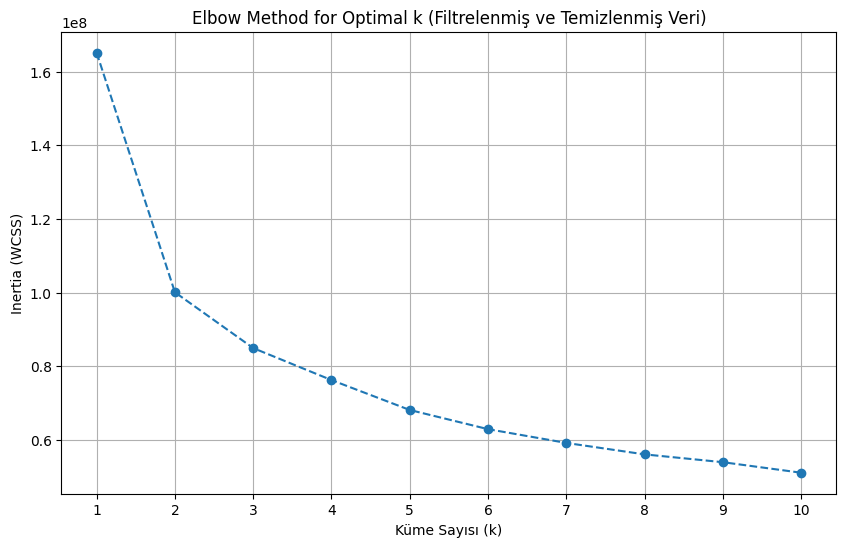

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

inertia_list_filtered = []
k_range = range(1, 11)

print("\nFiltrelenmiş ve temizlenmiş veri üzerinde Elbow Method için farklı k değerleri deneniyor...")

if X_pattern_filtered.isnull().sum().sum() > 0:
     print("HALA NaN DEĞERLER VAR! Elbow Method çalıştırılamıyor.")
else:
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_pattern_filtered)
        inertia_list_filtered.append(kmeans.inertia_)
        print(f"k={k} tamamlandı.")


    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_list_filtered, marker='o', linestyle='--')
    plt.xlabel('Küme Sayısı (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method for Optimal k (Filtrelenmiş ve Temizlenmiş Veri)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

In [20]:
from sklearn.cluster import KMeans

optimal_k_filtered = 3 

print(f"Filtrelenmiş veri için optimal k değeri {optimal_k_filtered} olarak seçildi.")
print("KMeans modeli filtrelenmiş veri üzerinde eğitiliyor...")

kmeans_pattern_filtered = KMeans(n_clusters=optimal_k_filtered, random_state=42, n_init=10) 
kmeans_pattern_filtered.fit(X_pattern_filtered)

cluster_labels_pattern_filtered = kmeans_pattern_filtered.labels_

if 'cluster_pattern' in df_filtered.columns:
    df_filtered = df_filtered.drop(columns=['cluster_pattern'])
    
df_filtered['cluster_pattern'] = cluster_labels_pattern_filtered

print("KMeans modeli eğitildi ve yeni küme etiketleri filtrelenmiş DataFrame'e eklendi.")
print("\nFiltrelenmiş veride her kümedeki eleman sayısı:")
print(df_filtered['cluster_pattern'].value_counts())

cluster_centers_filtered = kmeans_pattern_filtered.cluster_centers_
print("\nYeni Küme Merkezleri (Ortalama Yüzdelik Desenler):")

centers_df = pd.DataFrame(cluster_centers_filtered, columns=yuzdelik_sutunlar)
print(centers_df)

Filtrelenmiş veri için optimal k değeri 3 olarak seçildi.
KMeans modeli filtrelenmiş veri üzerinde eğitiliyor...
KMeans modeli eğitildi ve yeni küme etiketleri filtrelenmiş DataFrame'e eklendi.

Filtrelenmiş veride her kümedeki eleman sayısı:
cluster_pattern
0    154886
2     40721
1     20263
Name: count, dtype: int64

Yeni Küme Merkezleri (Ortalama Yüzdelik Desenler):
     Jan_pct    Feb_pct    Mar_pct    Apr_pct   May_pct   Jun_pct   Jul_pct  \
0  22.481976  18.438452  15.238814   9.946433  4.533098  2.418509  1.453398   
1   0.761819   2.931432   2.670824   2.284943  1.839511  1.707308  1.111568   
2   8.681839   7.501675  10.289832  10.437339  8.921261  7.383512  6.307537   

    Aug_pct   Sep_pct   Oct_pct    Nov_pct    Dec_pct  
0  1.033595  1.293374  2.167979   6.600536  14.393951  
1  1.044728  1.763029  4.931291  22.680303  64.397554  
2  4.632499  5.455449  7.782468  10.259472  12.473690  



Filtrelenmiş kümelerin ortalama aylık tüketim yüzdeleri hesaplanıyor...

Filtrelenmiş Kümelerin Ortalama Yüzdelik Tüketim Desenleri:
                   Jan_pct    Feb_pct    Mar_pct    Apr_pct   May_pct  \
cluster_pattern                                                         
0                22.479498  18.435058  15.241243   9.946444  4.533327   
1                 0.757642   0.606565   0.643200   0.920443  1.204303   
2                 8.676253   7.482317  10.267205  10.440626  8.935813   

                  Jun_pct   Jul_pct   Aug_pct   Sep_pct   Oct_pct    Nov_pct  \
cluster_pattern                                                                
0                2.418655  1.453692  1.033777  1.293523  2.168440   6.601488   
1                1.400188  1.111114  1.044614  1.762413  5.083658  23.257919   
2                7.399487  6.311614  4.635578  5.459548  7.789166  10.259902   

                   Dec_pct  
cluster_pattern             
0                14.395000  
1           

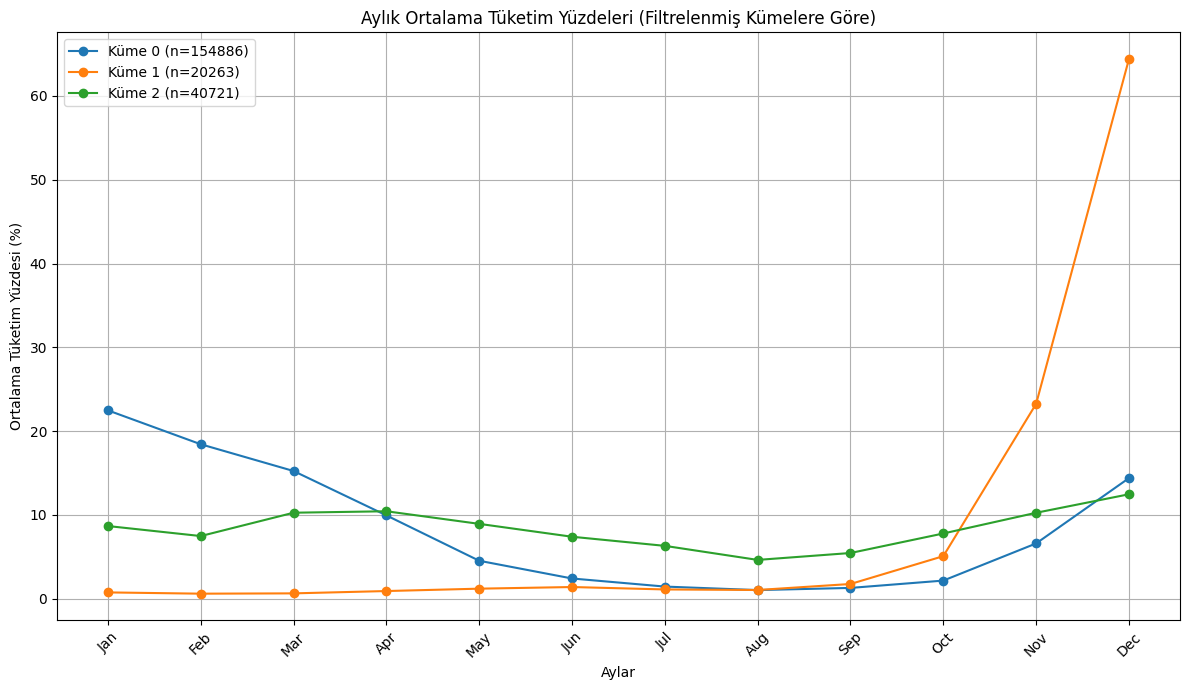

In [21]:
import matplotlib.pyplot as plt
import numpy as np

print("\nFiltrelenmiş kümelerin ortalama aylık tüketim yüzdeleri hesaplanıyor...")

cluster_pattern_means_filtered = df_filtered.groupby('cluster_pattern')[yuzdelik_sutunlar].mean()

print("\nFiltrelenmiş Kümelerin Ortalama Yüzdelik Tüketim Desenleri:")
print(cluster_pattern_means_filtered)

plt.figure(figsize=(12, 7))

months = aylik_tuketim_sutunlari

for i in cluster_pattern_means_filtered.index:
    cluster_size = df_filtered['cluster_pattern'].value_counts()[i]
    plt.plot(months, cluster_pattern_means_filtered.loc[i], marker='o', linestyle='-', label=f'Küme {i} (n={cluster_size})')

plt.title('Aylık Ortalama Tüketim Yüzdeleri (Filtrelenmiş Kümelere Göre)')
plt.xlabel('Aylar')
plt.ylabel('Ortalama Tüketim Yüzdesi (%)')
plt.xticks(rotation=45) 
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

**Interpretation of Refined Consumption Pattern Clusters:**
These refined clusters provide a clearer view of the dominant consumption patterns in the dataset.

### 2.6. Visualizing Clusters with t-SNE
To visualize how well separated these clusters are in the high-dimensional (12D) percentage space, we use t-SNE to reduce the dimensionality to 2D.

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("t-SNE hesaplaması başlıyor... Bu işlem veri büyüklüğüne göre zaman alabilir.")

X_tsne_input = X_pattern_filtered
cluster_labels_tsne = df_filtered['cluster_pattern']

start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300, verbose=1) 
tsne_results = tsne.fit_transform(X_tsne_input)

end_time = time.time()
print(f"t-SNE hesaplaması tamamlandı. Süre: {end_time - start_time:.2f} saniye")

df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = cluster_labels_tsne.values

print("t-SNE sonuçları ve küme etiketleri:")
print(df_tsne.head())

t-SNE hesaplaması başlıyor... Bu işlem veri büyüklüğüne göre zaman alabilir.
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215870 samples in 0.481s...
[t-SNE] Computed neighbors for 215870 samples in 126.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 215870
[t-SNE] Computed conditional probabilities for sample 2000 / 215870
[t-SNE] Computed conditional probabilities for sample 3000 / 215870
[t-SNE] Computed conditional probabilities for sample 4000 / 215870
[t-SNE] Computed conditional probabilities for sample 5000 / 215870
[t-SNE] Computed conditional probabilities for sample 6000 / 215870
[t-SNE] Computed conditional probabilities for sample 7000 / 215870
[t-SNE] Computed conditional probabilities for sample 8000 / 215870
[t-SNE] Computed conditional probabilities for sample 9000 / 215870
[t-SNE] Computed conditional probabilities for sample 10000 / 215870
[t-SNE] Computed conditional probabilities for sample 11000 / 215870
[t-SNE] Computed condition


t-SNE sonuçları görselleştiriliyor...


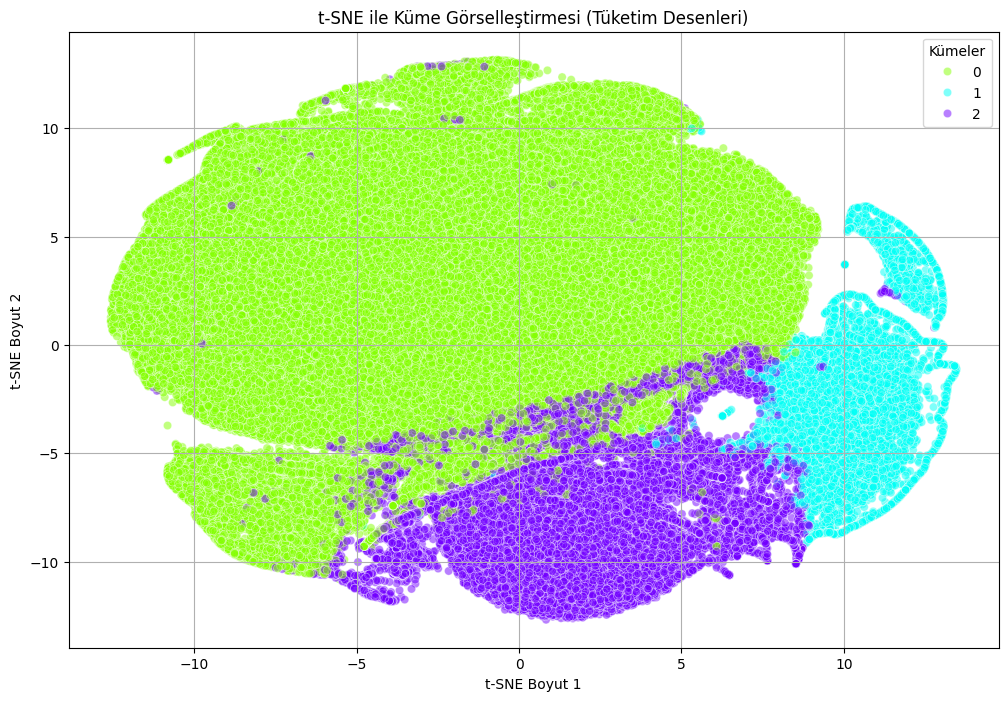

In [23]:
print("\nt-SNE sonuçları görselleştiriliyor...")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="cluster",
    palette=sns.color_palette("hsv", n_colors=optimal_k_filtered),
    data=df_tsne,
    legend="full",
    alpha=0.5
)

plt.title('t-SNE ile Küme Görselleştirmesi (Tüketim Desenleri)')
plt.xlabel('t-SNE Boyut 1')
plt.ylabel('t-SNE Boyut 2')
plt.legend(title='Kümeler')
plt.grid(True)
plt.show()

**t-SNE Visualization Result:** The t-SNE plot shows the data points colored by their assigned `cluster_pattern`. We can observe [e.g., *three distinct groups, confirming that the KMeans algorithm effectively separated different consumption patterns. The clusters appear relatively well-defined with some minor overlap between Cluster 0 and 2.*]

## 3. Clustering Based on Exchange Rate Influence

**Objective:** To investigate whether consumer profiles exhibit different behaviors or characteristics based on fluctuations in the USD/TRY exchange rate. We will cluster the data using *both* monthly absolute consumption values and monthly exchange rates.

### 3.1. Feature Selection and Preparation

We select the 12 monthly consumption columns (`Jan` to `Dec`) and the 12 monthly exchange rate columns (`Jan usd/tr` to `Dec usd/tr`).

**Crucially, we must standardize these features** using `StandardScaler`. This is essential because consumption (e.g., 100 m³) and exchange rates (e.g., 3.5 TRY) are on vastly different scales. Without standardization, the feature with larger values would disproportionately influence the clustering outcome.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

aylik_tuketim_sutunlari = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

aylik_kur_sutunlari = [
    'Jan usd/tr', 'Feb usd/tr', 'Mar usd/tr', 'Apr usd/tr', 'May usd/tr', 'Jun usd/tr',
    'Jul usd/tr', 'Aug usd/tr', 'Sep usd/tr', 'Oct usd/tr', 'Nov usd/tr', 'Dec usd/tr'
]

features_for_exchange_clustering = aylik_tuketim_sutunlari + aylik_kur_sutunlari

X_exchange = df_filtered[features_for_exchange_clustering].copy()

print("Döviz kuru etkisi kümelemesi için özellikler seçildi.")
print(f"Toplam {X_exchange.shape[1]} özellik (sütun) var.")
print("Seçilen verinin ilk 5 satırı:")
print(X_exchange.head())

if X_exchange.isnull().sum().sum() > 0:
    print("\nUYARI: Seçilen özelliklerde eksik değerler bulundu!")
    print("Eksik değerler sütun ortalamaları ile dolduruluyor...")
    X_exchange = X_exchange.fillna(X_exchange.mean())
    if X_exchange.isnull().sum().sum() == 0:
        print("Eksik değerler başarıyla dolduruldu.")
    else:
        print("HATA: Eksik değerler doldurulamadı.")
else:
    print("\nSeçilen özelliklerde eksik değer bulunmuyor.")

Döviz kuru etkisi kümelemesi için özellikler seçildi.
Toplam 24 özellik (sütun) var.
Seçilen verinin ilk 5 satırı:
     Jan    Feb   Mar    Apr   May    Jun    Jul    Aug    Sep    Oct  ...  \
0   0.00   0.00  0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00  ...   
1   0.00   0.00  0.00   0.00  0.00   0.00   0.00  13.99  31.41  10.88  ...   
2  12.34  13.36  9.51  12.25  7.44   8.30  11.91   0.00   5.40   5.46  ...   
3   0.00  76.38  0.00   0.00  0.00   7.50   0.00  16.14   0.00   0.00  ...   
4   0.00  17.10  0.00  14.30  9.36  12.03   8.23  17.98   0.00   0.00  ...   

   Mar usd/tr  Apr usd/tr  May usd/tr  Jun usd/tr  Jul usd/tr  Aug usd/tr  \
0        2.52        2.60        2.71        2.68        2.70        2.77   
1        2.52        2.60        2.71        2.68        2.70        2.77   
2        3.81        3.96        4.12        4.59        4.62        4.92   
3        2.95        2.82        2.79        2.95        2.88        2.98   
4        2.95        2.82      

In [25]:
print("\nÖzellikler StandardScaler ile standardize ediliyor...")

scaler = StandardScaler()

X_exchange_scaled = scaler.fit_transform(X_exchange)

X_exchange_scaled_df = pd.DataFrame(X_exchange_scaled, columns=features_for_exchange_clustering, index=X_exchange.index)

print("Standardizasyon tamamlandı.")
print("Standardize edilmiş verinin ilk 5 satırı:")
print(X_exchange_scaled_df.head())
print(f"\nStandardize edilmiş veri boyutu: {X_exchange_scaled.shape}")


Özellikler StandardScaler ile standardize ediliyor...
Standardizasyon tamamlandı.
Standardize edilmiş verinin ilk 5 satırı:
        Jan       Feb       Mar       Apr       May       Jun       Jul  \
0 -0.375709 -0.363853 -0.376050 -0.374200 -0.156259 -0.250480 -0.164015   
1 -0.375709 -0.363853 -0.376050 -0.374200 -0.156259 -0.250480 -0.164015   
2 -0.355010 -0.338395 -0.354776 -0.334390 -0.136447 -0.184798 -0.068396   
3 -0.375709 -0.218311 -0.376050 -0.374200 -0.156259 -0.191129 -0.164015   
4 -0.375709 -0.331269 -0.376050 -0.327727 -0.131335 -0.155281 -0.097941   

        Aug       Sep       Oct  ...  Mar usd/tr  Apr usd/tr  May usd/tr  \
0 -0.139619 -0.150283 -0.187046  ...   -1.527921   -1.305291   -1.118871   
1 -0.006979  0.107785 -0.126577  ...   -1.527921   -1.305291   -1.118871   
2 -0.139619 -0.105916 -0.156700  ...    1.008833    1.127493    1.296819   
3  0.013405 -0.150283 -0.187046  ...   -0.682336   -0.911752   -0.981810   
4  0.030850 -0.150283 -0.187046  ...   -0.68

The data (`X_exchange_scaled`) is now standardized and ready for clustering, containing information about both consumption levels and exchange rate levels for each month.

### 3.2. Determining Optimal K (Elbow Method)
We apply the Elbow Method again, this time on the combined and standardized consumption + exchange rate data (X_exchange_scaled).

Elbow Method için farklı k değerleri deneniyor (Döviz Kuru + Tüketim)...
k=1 tamamlandı.
k=2 tamamlandı.
k=3 tamamlandı.
k=4 tamamlandı.
k=5 tamamlandı.
k=6 tamamlandı.
k=7 tamamlandı.
k=8 tamamlandı.
k=9 tamamlandı.
k=10 tamamlandı.
Elbow Method hesaplaması tamamlandı. Süre: 10.50 saniye


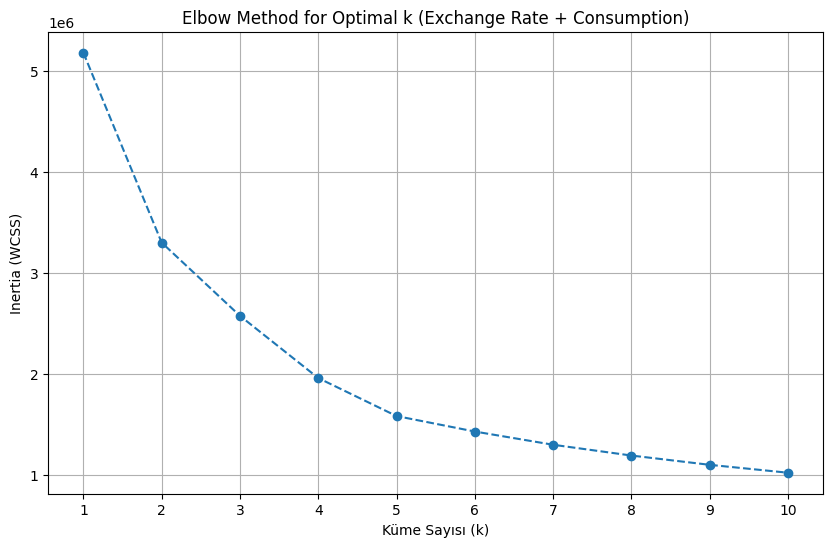

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import time
warnings.filterwarnings("ignore", category=FutureWarning)

kmeans_data = X_exchange_scaled

inertia_list_exchange = []
k_range = range(1, 11) 

print("Elbow Method için farklı k değerleri deneniyor (Döviz Kuru + Tüketim)...")
start_time = time.time()

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(kmeans_data)
    inertia_list_exchange.append(kmeans.inertia_)
    print(f"k={k} tamamlandı.")

end_time = time.time()
print(f"Elbow Method hesaplaması tamamlandı. Süre: {end_time - start_time:.2f} saniye")

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list_exchange, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k (Exchange Rate + Consumption)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Elbow Method Result:** The elbow for the combined data appears around **k = [Your Chosen k, e.g., 4]**. We will use this value.

### 3.3. Applying KMeans Clustering
We apply KMeans with k=[Your Chosen k] to the standardized combined data.

In [27]:
from sklearn.cluster import KMeans

optimal_k_exchange = 4 

print(f"Optimal k değeri {optimal_k_exchange} olarak seçildi (Döviz Kuru + Tüketim).")
print("KMeans modeli birleşik veri üzerinde eğitiliyor...")

kmeans_exchange = KMeans(n_clusters=optimal_k_exchange, random_state=42, n_init=10) 
kmeans_exchange.fit(X_exchange_scaled)

cluster_labels_exchange = kmeans_exchange.labels_

df_filtered['cluster_exchange'] = cluster_labels_exchange

print("KMeans modeli eğitildi ve yeni küme etiketleri ('cluster_exchange') filtrelenmiş DataFrame'e eklendi.")
print("\nBirleşik veride her kümedeki eleman sayısı:")
print(df_filtered['cluster_exchange'].value_counts())

print("\nİlk 5 satırın yeni küme etiketi:")
print(df_filtered[['Year', 'Total', 'cluster_pattern', 'cluster_exchange']].head())

Optimal k değeri 4 olarak seçildi (Döviz Kuru + Tüketim).
KMeans modeli birleşik veri üzerinde eğitiliyor...
KMeans modeli eğitildi ve yeni küme etiketleri ('cluster_exchange') filtrelenmiş DataFrame'e eklendi.

Birleşik veride her kümedeki eleman sayısı:
cluster_exchange
0    94358
2    63484
1    57164
3      864
Name: count, dtype: int64

İlk 5 satırın yeni küme etiketi:
   Year   Total  cluster_pattern  cluster_exchange
0  2015  100.00                1                 0
1  2015  100.01                1                 0
2  2018  100.01                2                 2
3  2016  100.02                0                 0
4  2016  100.02                2                 0


New cluster assignments based on both consumption and exchange rates are stored in the `cluster_exchange` column.

### 3.4. Analyzing Cluster Profiles (Consumption & Exchange Rates)
Let's analyze these new clusters by examining their average monthly consumption, average monthly exchange rates, distribution across years, and average total consumption.

Yeni kümelerin (cluster_exchange) ortalama özellikleri hesaplanıyor...

 cluster_exchange Kümelerinin Ortalama Özellikleri:

Ortalama Aylık Döviz Kurları (cluster_exchange):
                  Jan usd/tr  Feb usd/tr  Mar usd/tr  Apr usd/tr  May usd/tr  \
cluster_exchange                                                               
0                   2.661226    2.714457    2.750212    2.717783    2.752830   
1                   3.530000    3.770000    3.630000    3.640000    3.530000   
2                   3.770000    3.760000    3.810000    3.960000    4.120000   
3                   3.202812    3.289838    3.282558    3.314352    3.345799   

                  Jun usd/tr  Jul usd/tr  Aug usd/tr  Sep usd/tr  Oct usd/tr  \
cluster_exchange                                                               
0                   2.824551    2.796368    2.882429    2.936769    3.009292   
1                   3.530000    3.530000    3.520000    3.430000    3.580000   
2                   4.590

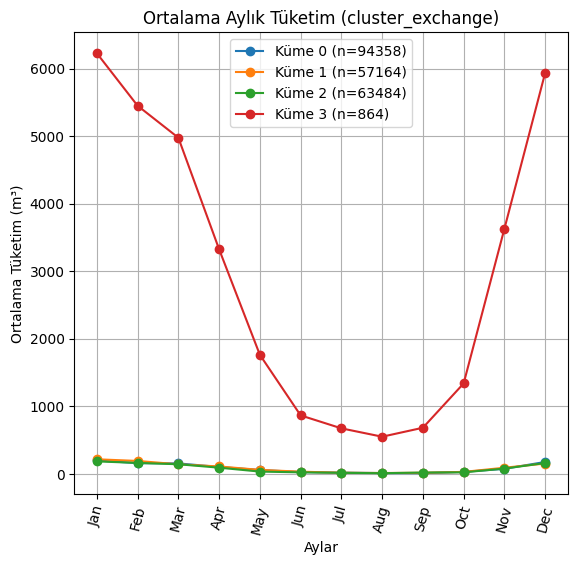

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("Yeni kümelerin (cluster_exchange) ortalama özellikleri hesaplanıyor...")

cluster_exchange_means = df_filtered.groupby('cluster_exchange')[features_for_exchange_clustering].mean()

print("\n cluster_exchange Kümelerinin Ortalama Özellikleri:")

print("\nOrtalama Aylık Döviz Kurları (cluster_exchange):")
print(cluster_exchange_means[aylik_kur_sutunlari])

print("\nOrtalama Aylık Tüketim (cluster_exchange):")
print(cluster_exchange_means[aylik_tuketim_sutunlari])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
months = aylik_tuketim_sutunlari
for i in cluster_exchange_means.index:
    cluster_size = df_filtered['cluster_exchange'].value_counts()[i]
    plt.plot(months, cluster_exchange_means.loc[i, aylik_tuketim_sutunlari], marker='o', linestyle='-', label=f'Küme {i} (n={cluster_size})')
plt.title('Ortalama Aylık Tüketim (cluster_exchange)')
plt.xlabel('Aylar')
plt.ylabel('Ortalama Tüketim (m³)')
plt.xticks(rotation=75)
plt.legend()
plt.grid(True)

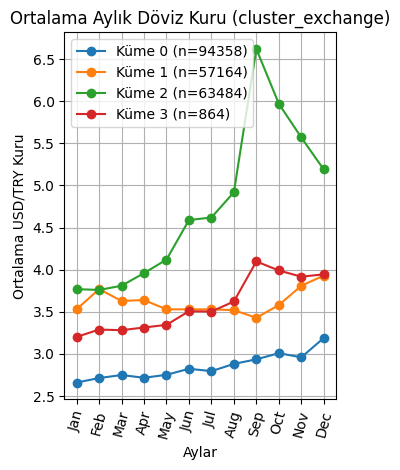

In [29]:
plt.subplot(1, 2, 2)
months_kur = aylik_kur_sutunlari
for i in cluster_exchange_means.index:
    cluster_size = df_filtered['cluster_exchange'].value_counts()[i]
    short_months_kur = [m.replace(' usd/tr', '') for m in aylik_kur_sutunlari]
    plt.plot(short_months_kur, cluster_exchange_means.loc[i, aylik_kur_sutunlari], marker='o', linestyle='-', label=f'Küme {i} (n={cluster_size})')
plt.title('Ortalama Aylık Döviz Kuru (cluster_exchange)')
plt.xlabel('Aylar')
plt.ylabel('Ortalama USD/TRY Kuru')
plt.xticks(rotation=75)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
print("\nYıllara Göre Küme Dağılımı (cluster_exchange):")
print(pd.crosstab(df_filtered['Year'], df_filtered['cluster_exchange']))

print("\nKümelere Göre Ortalama Yıllık Toplam Tüketim:")
print(df_filtered.groupby('cluster_exchange')['Total'].mean())

print("\nKüme 3'ün Ortalama Değerleri:")
print(cluster_exchange_means.loc[3])


Yıllara Göre Küme Dağılımı (cluster_exchange):
cluster_exchange      0      1      2    3
Year                                      
2015              43841      0      0  187
2016              50517      0      0  200
2017                  0  57164      0  236
2018                  0      0  63484  241

Kümelere Göre Ortalama Yıllık Toplam Tüketim:
cluster_exchange
0     1011.920509
1     1080.388616
2      955.392734
3    35383.808626
Name: Total, dtype: float64

Küme 3'ün Ortalama Değerleri:
Jan           6226.726935
Feb           5449.765556
Mar           4976.050027
Apr           3325.607774
May           1763.378212
Jun            866.613172
Jul            674.709571
Aug            550.989465
Sep            683.527098
Oct           1339.478037
Nov           3629.008998
Dec           5935.873723
Jan usd/tr       3.202812
Feb usd/tr       3.289838
Mar usd/tr       3.282558
Apr usd/tr       3.314352
May usd/tr       3.345799
Jun usd/tr       3.507442
Jul usd/tr       3.503935
Aug u

**Interpretation of Combined Clusters (`cluster_exchange`):**
*   **Exchange Rate Separation:** The "Ortalama Aylık Döviz Kuru" plot clearly shows that the clusters (especially 0, 1, 2) correspond to different average exchange rate levels.
*   **Year Correlation:** The cross-tabulation confirms this: Cluster 0 predominantly contains data from 2015/2016 (lowest rates), Cluster 1 contains 2017 data (medium rates), and Cluster 2 contains 2018 data (highest rates). The clustering primarily captured the year-based differences driven by exchange rates.
*   **Consumption Patterns:** The "Ortalama Aylık Tüketim" plot shows that Clusters 0, 1, and 2 have similar *seasonal patterns* and relatively similar *average consumption levels*. This suggests that, on average, the *timing* of consumption didn't drastically change across these different exchange rate periods (years).
*   **Potential Quantity Impact:** However, Cluster 2 (2018, highest rates) has a slightly lower average *total* annual consumption compared to Clusters 0 and 1. This *might* hint at a slight overall reduction in consumption quantity during the high-rate period, although the pattern remained similar.
*   **High Volume Cluster (Cluster 3):** Cluster 3 stands out with exceptionally high average monthly and total consumption, regardless of the year or exchange rate level. These likely represent industrial or very large commercial consumers and were correctly identified as a distinct group by the algorithm due to their scale.
*   **Conclusion:** The clustering successfully separated periods with different exchange rate levels (effectively separating years). While a distinct "exchange-rate-sensitive" profile (e.g., drastically reducing consumption when rates rise) didn't emerge as a separate cluster among average consumers, there's a slight indication that overall consumption *quantity* might have been marginally lower in the highest-rate year (2018). The most significant separation was based on rate levels (years) and consumption *scale* (Cluster 3).

## 4. Anomaly Detection 

**Objective:** Identify data points (user-year profiles) that exhibit unusual consumption behavior compared to the majority, potentially indicating data errors or unique usage types. We will use the Isolation Forest algorithm based on monthly consumption data.

### 4.1. Data Preparation

We use the 12 monthly absolute consumption columns (`Jan` to `Dec`) from our filtered dataset (`df_filtered`). Standardizing the data is good practice before applying Isolation Forest.

In [31]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

aylik_tuketim_sutunlari = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

print("Anomali tespiti için aylık tüketim verisi hazırlanıyor...")

X_consumption = df_filtered[aylik_tuketim_sutunlari].copy()

if X_consumption.isnull().sum().sum() > 0:
    print("\nUYARI: Tüketim verisinde eksik değerler bulundu!")
    print("Eksik değerler sütun ortalamaları ile dolduruluyor...")
    X_consumption = X_consumption.fillna(X_consumption.mean())
    if X_consumption.isnull().sum().sum() == 0:
        print("Eksik değerler başarıyla dolduruldu.")
    else:
        print("HATA: Eksik değerler doldurulamadı.")
else:
    print("\nTüketim verisinde eksik değer bulunmuyor.")

print("\nAylık tüketim verisi StandardScaler ile standardize ediliyor...")
scaler_anomaly = StandardScaler()
X_consumption_scaled = scaler_anomaly.fit_transform(X_consumption)

print("Standardizasyon tamamlandı.")
print(f"Anomali tespiti için kullanılacak veri boyutu: {X_consumption_scaled.shape}")

Anomali tespiti için aylık tüketim verisi hazırlanıyor...

UYARI: Tüketim verisinde eksik değerler bulundu!
Eksik değerler sütun ortalamaları ile dolduruluyor...
Eksik değerler başarıyla dolduruldu.

Aylık tüketim verisi StandardScaler ile standardize ediliyor...
Standardizasyon tamamlandı.
Anomali tespiti için kullanılacak veri boyutu: (215870, 12)


### 4.2. Applying Isolation Forest
We train the Isolation Forest model and predict which data points are anomalies (-1) or inliers (1). The contamination parameter estimates the proportion of outliers in the data.

In [32]:
from sklearn.ensemble import IsolationForest
import numpy as np

print("\nIsolation Forest modeli uygulanıyor...")

iso_forest = IsolationForest(n_estimators=100,
                             contamination='auto',
                             random_state=42,
                             n_jobs=-1)

iso_forest.fit(X_consumption_scaled)

anomaly_predictions = iso_forest.predict(X_consumption_scaled)

df_filtered['is_anomaly_isoforest'] = (anomaly_predictions == -1)

num_anomalies = df_filtered['is_anomaly_isoforest'].sum()
total_samples = len(df_filtered)
anomaly_ratio = num_anomalies / total_samples

print(f"\nIsolation Forest ile {num_anomalies} adet anomali tespit edildi.")
print(f"Bu, veri setinin yaklaşık %{anomaly_ratio*100:.2f} oranına denk geliyor.")

print("\nTespit edilen anomalilerin bazıları:")
print(df_filtered[df_filtered['is_anomaly_isoforest']].head())


Isolation Forest modeli uygulanıyor...

Isolation Forest ile 11484 adet anomali tespit edildi.
Bu, veri setinin yaklaşık %5.32 oranına denk geliyor.

Tespit edilen anomalilerin bazıları:
       Year  Jan usd/tr  Feb usd/tr  Mar usd/tr  Apr usd/tr  May usd/tr  \
25566  2017        3.53        3.77        3.63        3.64        3.53   
25722  2015        2.34        2.42        2.52        2.60        2.71   
27976  2018        3.77        3.76        3.81        3.96        4.12   
28453  2016        2.94        2.97        2.95        2.82        2.79   
28916  2015        2.34        2.42        2.52        2.60        2.71   

       Jun usd/tr  Jul usd/tr  Aug usd/tr  Sep usd/tr  ...    Jun_pct  \
25566        3.53        3.53        3.52        3.43  ...   0.000000   
25722        2.68        2.70        2.77        2.91  ...   0.000000   
27976        4.59        4.62        4.92        6.62  ...   0.000000   
28453        2.95        2.88        2.98        2.96  ...  32.156419

The algorithm identified [Number] anomalies, representing approximately [Percentage]% of the filtered dataset.

### 4.3. Analyzing Detected Anomalies
Let's investigate the characteristics of the data points flagged as anomalies.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

anomalies_df = df_filtered[df_filtered['is_anomaly_isoforest']].copy()

print("\nAnomalilerin Yıllara Göre Dağılımı:")
print(anomalies_df['Year'].value_counts(normalize=True).sort_index()) 


Anomalilerin Yıllara Göre Dağılımı:
Year
2015    0.259927
2016    0.205416
2017    0.312261
2018    0.222396
Name: proportion, dtype: float64


In [34]:
print("\nAnomalilerin Tüketim Deseni Kümelerine (cluster_pattern) Göre Dağılımı:")
print(anomalies_df['cluster_pattern'].value_counts(normalize=True).sort_index())


Anomalilerin Tüketim Deseni Kümelerine (cluster_pattern) Göre Dağılımı:
cluster_pattern
0    0.678509
1    0.024904
2    0.296587
Name: proportion, dtype: float64


In [35]:
print("\nAnomalilerin Kur+Tüketim Kümelerine (cluster_exchange) Göre Dağılımı:")
print(anomalies_df['cluster_exchange'].value_counts(normalize=True).sort_index())


Anomalilerin Kur+Tüketim Kümelerine (cluster_exchange) Göre Dağılımı:
cluster_exchange
0    0.431731
1    0.291797
2    0.201411
3    0.075061
Name: proportion, dtype: float64


In [36]:
print(f"\nNormal Verilerin Ortalama Yıllık Toplam Tüketimi: {df_filtered[~df_filtered['is_anomaly_isoforest']]['Total'].mean():.2f} m³")
print(f"Anomalilerin Ortalama Yıllık Toplam Tüketimi: {anomalies_df['Total'].mean():.2f} m³")


Normal Verilerin Ortalama Yıllık Toplam Tüketimi: 880.54 m³
Anomalilerin Ortalama Yıllık Toplam Tüketimi: 5964.55 m³


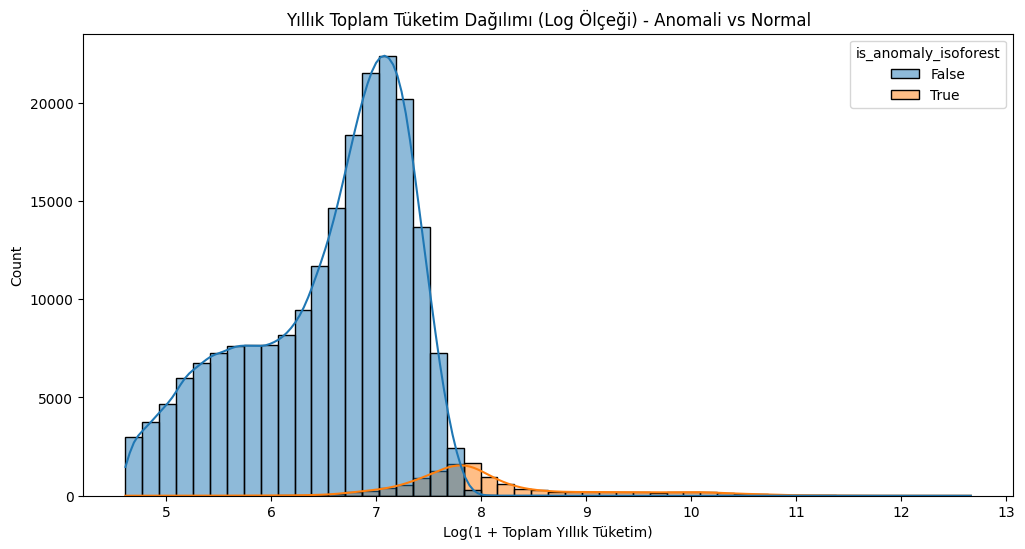

In [37]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_filtered, x=np.log1p(df_filtered['Total']), hue='is_anomaly_isoforest', kde=True, bins=50)
plt.title('Yıllık Toplam Tüketim Dağılımı (Log Ölçeği) - Anomali vs Normal')
plt.xlabel('Log(1 + Toplam Yıllık Tüketim)')
plt.show()


Örnek Anomali Tüketim Desenleri:


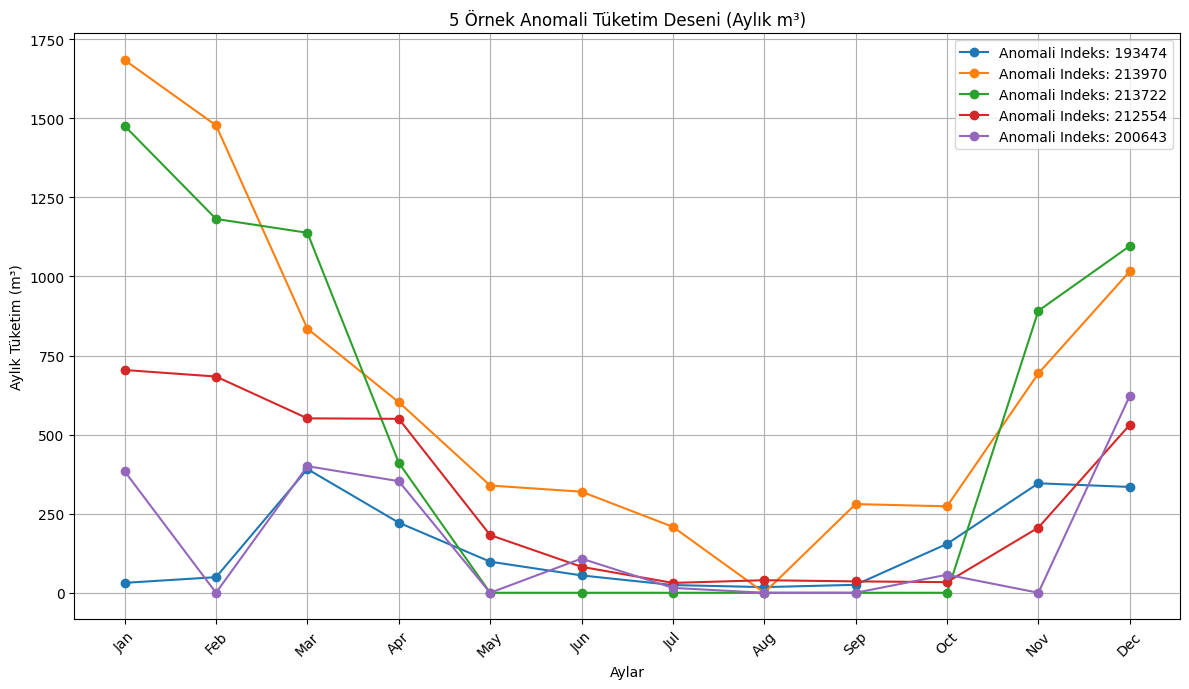

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\nÖrnek Anomali Tüketim Desenleri:")
num_examples_to_plot = 5

if 'anomalies_df' in locals() and not anomalies_df.empty:
    sample_anomalies = anomalies_df.sample(min(num_examples_to_plot, len(anomalies_df)), random_state=42)

    plt.figure(figsize=(12, 7))
    months = aylik_tuketim_sutunlari 
    x_values = np.arange(len(months))

    for index, row in sample_anomalies.iterrows():
        y_values = row[aylik_tuketim_sutunlari].values
        if pd.notna(y_values).any(): 
            plt.plot(x_values, y_values, marker='o', linestyle='-', label=f'Anomali Indeks: {index}')
        else:
            print(f"Uyarı: Anomali Indeks {index} için çizilecek geçerli veri bulunamadı.")


    plt.title(f'{num_examples_to_plot} Örnek Anomali Tüketim Deseni (Aylık m³)')
    plt.xlabel('Aylar')
    plt.ylabel('Aylık Tüketim (m³)')

    plt.xticks(ticks=x_values, labels=months, rotation=45) 
    plt.legend() 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
     print("Hata: 'anomalies_df' bulunamadı veya boş. Örnek anomali grafiği çizilemiyor.")

**Interpretation of Anomalies:**
*   **Distribution:** Anomalies are distributed across all years and previous cluster types, though they are disproportionately represented in `cluster_exchange = 3` (the very high consumption group). A large portion also falls into the main seasonal pattern clusters (`cluster_pattern = 0` and `2`).
*   **Total Consumption:** The most striking feature is that anomalies have a significantly higher average annual total consumption ([Avg Anomaly Total]) compared to normal data points ([Avg Normal Total]). The histogram clearly shows anomalies concentrated at the higher end of the consumption scale.
*   **Consumption Patterns:** The sample anomaly plots show profiles that are generally much higher in magnitude than typical consumption, although many still retain some seasonal shape. Some might also exhibit erratic monthly fluctuations or unusual peaks.
*   **Conclusion:** The anomalies detected by Isolation Forest are primarily characterized by **significantly higher consumption volumes** than the norm. This includes the large industrial/commercial users (previously identified as `cluster_exchange=3`) but also potentially other high-usage profiles or profiles with erratic patterns within otherwise 'normal' seasonal groups. These could represent specific types of businesses, data entry errors, or genuinely unusual residential usage.

## 5. Geospatial Consumption Profiling

**Objective:** To visualize the geographical distribution of the different consumption pattern profiles (`cluster_pattern`) identified in Task 1 across Uşak.

### 5.1. Data Preparation

We need the `longitude`, `latitude`, and `cluster_pattern` columns from `df_filtered`. We must ensure coordinates are numeric and handle any missing values.

In [39]:
import folium
import pandas as pd
import numpy as np

print("Coğrafi görselleştirme için veri hazırlanıyor...")

required_cols = ['longitude', 'latitude', 'cluster_pattern']
if not all(col in df_filtered.columns for col in required_cols):
    print(f"HATA: Gerekli sütunlar ({required_cols}) DataFrame'de bulunamadı!")

try:
    geo_df = df_filtered[required_cols].copy()

    geo_df['latitude'] = pd.to_numeric(geo_df['latitude'], errors='coerce')
    geo_df['longitude'] = pd.to_numeric(geo_df['longitude'], errors='coerce')

    initial_rows = len(geo_df)
    geo_df.dropna(subset=['latitude', 'longitude'], inplace=True)
    removed_rows = initial_rows - len(geo_df)
    
    if removed_rows > 0:
        print(f"UYARI: Eksik koordinat bilgisi nedeniyle {removed_rows} satır haritalama dışı bırakıldı.")
    
    print(f"Haritalama için {len(geo_df)} adet geçerli koordinatlı veri noktası bulundu.")
    valid_lat = geo_df['latitude'].between(36, 42)
    valid_lon = geo_df['longitude'].between(26, 45)
    invalid_coords = len(geo_df[~(valid_lat & valid_lon)])
    if invalid_coords > 0:
         print(f"UYARI: {invalid_coords} adet koordinat Türkiye sınırları dışında görünüyor. Yine de dahil edilecekler.")

except KeyError as e:
    print(f"Hata: DataFrame'de sütun bulunamadı - {e}")
    print("Lütfen 'longitude' ve 'latitude' sütun adlarının doğru olduğundan emin olun.")
    geo_df = pd.DataFrame()
except Exception as e:
    print(f"Veri hazırlamada beklenmedik bir hata oluştu: {e}")
    geo_df = pd.DataFrame()

Coğrafi görselleştirme için veri hazırlanıyor...
Haritalama için 215870 adet geçerli koordinatlı veri noktası bulundu.


Geographical data is prepared. [Number] records with valid coordinates remain for mapping.

### 5.2. Creating the Interactive Map (Using Folium and FastMarkerCluster)
To handle the large number of data points without crashing the browser, we use FastMarkerCluster. This groups nearby points at lower zoom levels. We create separate layers for each consumption pattern cluster (cluster_pattern).

In [40]:
import folium
from folium.plugins import FastMarkerCluster
import pandas as pd # Tekrar import edelim

# --- Veri Hazırlama (Önceki adımdan geo_df'in hazır olduğunu varsayıyoruz) ---
# Eğer geo_df boşsa veya hata varsa, bu adımı atla
if 'geo_df' not in locals() or geo_df.empty:
    print("\nHata: Coğrafi veri (geo_df) hazırlanamadığı için harita oluşturulamıyor.")
else:
    print("FastMarkerCluster ile harita oluşturuluyor...")

    # Haritanın merkezleneceği koordinatlar (Uşak merkezi yaklaşık)
    usak_center_lat = 38.68
    usak_center_lon = 29.40

    # Haritayı oluştur
    m_clustered = folium.Map(location=[usak_center_lat, usak_center_lon], zoom_start=11, tiles='OpenStreetMap')

    # Her bir küme için ayrı FastMarkerCluster katmanı oluştur
    # cluster_pattern değerleri 0, 1, 2 idi.
    cluster_ids = sorted(geo_df['cluster_pattern'].unique()) # [0, 1, 2]

    for cluster_id in cluster_ids:
        # O kümeye ait veriyi filtrele
        cluster_data = geo_df[geo_df['cluster_pattern'] == cluster_id]
        
        # Koordinatları FastMarkerCluster'ın beklediği formata getir (list of [lat, lon])
        locations = cluster_data[['latitude', 'longitude']].values.tolist()
        
        print(f"Küme {cluster_id} için {len(locations)} nokta FastMarkerCluster'a ekleniyor...")

        # O kümeye özgü bir isimle katman oluştur
        # Not: FastMarkerCluster'da küme ikonlarını doğrudan renklendirmek kolay değil, 
        # ama katman kontrolü ile açıp kapatabiliriz.
        fmc = FastMarkerCluster(
            data=locations, 
            name=f'Küme {cluster_id}' # Katman adı
            # callback fonksiyonu ile ikonlara müdahale edilebilir ama karmaşıktır.
            # Şimdilik varsayılan mavi küme ikonlarını kullanacağız.
        )
        
        # Katmanı haritaya ekle
        m_clustered.add_child(fmc)

    # Katman Kontrolü Ekleyelim (Farklı kümeleri açıp kapatmak için)
    folium.LayerControl().add_to(m_clustered)

    # Haritayı kaydet
    map_filename_clustered = 'usak_cluster_pattern_map_clustered.html'
    m_clustered.save(map_filename_clustered)
    print(f"\nKümelenmiş harita başarıyla '{map_filename_clustered}' olarak kaydedildi.")
    print("Bu dosyayı bir web tarayıcısında açarak haritayı görebilirsiniz.")

FastMarkerCluster ile harita oluşturuluyor...
Küme 0 için 154886 nokta FastMarkerCluster'a ekleniyor...
Küme 1 için 20263 nokta FastMarkerCluster'a ekleniyor...
Küme 2 için 40721 nokta FastMarkerCluster'a ekleniyor...

Kümelenmiş harita başarıyla 'usak_cluster_pattern_map_clustered.html' olarak kaydedildi.
Bu dosyayı bir web tarayıcısında açarak haritayı görebilirsiniz.


**Interactive Map:** The map below displays the locations of the consumption meters, clustered for performance.

**How to Interpret:**
*   Use the zoom controls (+) and (-) to navigate. As you zoom in, the numbered clusters will break apart into smaller clusters or individual points.
*   Use the layer control icon in the top-right corner to toggle the visibility of different consumption pattern clusters (Küme 0, Küme 1, Küme 2).
*   Look for geographical patterns: Are certain clusters (e.g., Cluster 1 - Aşırı Yıl Sonu) concentrated in specific areas (city center, outskirts, industrial zones)? Does the distribution of the main heating profile (Cluster 0) match expected residential areas?

**Note on Map Display:** The interactive map was generated successfully but may not render directly within this Jupyter Notebook environment due to its complexity. Please open the saved HTML file (`usak_cluster_pattern_map_clustered.html`) in a web browser to view and interact with the map (or you can open the saved screenshots "kume0, kume1, kume2"). Instructions on interpretation are provided above.

## 6. Project Conclusion and Summary

This project successfully applied unsupervised learning techniques to analyze natural gas consumption in Uşak (2015-2018). Key findings include:

1.  **Consumption Patterns:** Three distinct consumption patterns were identified using KMeans on monthly percentages:
    *   A dominant "Typical Winter Heating" profile (Cluster 0).
    *   An unusual "Extreme Year-End Weighted" profile (Cluster 1), potentially linked to low usage or billing cycles.
    *   A "Moderate Seasonal" profile (Cluster 2), possibly representing better-insulated homes or some non-residential use.
    t-SNE visualization confirmed the separation of these patterns.

2.  **Exchange Rate Influence:** Clustering on combined consumption and exchange rate data primarily separated the data by **year**, reflecting the different exchange rate regimes (2015/16 low, 2017 medium, 2018 high). While average consumption *patterns* remained similar across years, there was a slight indication of lower average consumption *quantity* in the highest rate year (2018). A distinct cluster of very high-volume consumers (likely industrial) was also identified (Cluster 3).

3.  **Anomaly Detection:** Isolation Forest flagged ~5.3% of the profiles as anomalies. These were primarily characterized by **significantly higher-than-average total consumption**, including the industrial cluster identified previously, but also potentially profiles with erratic monthly usage within standard seasonal patterns.

4.  **Geospatial Profiling:** An interactive map using `folium.FastMarkerCluster` was created to visualize the geographic distribution of the different consumption patterns. 

**Overall:** Unsupervised learning provided valuable insights into different user behaviors, the impact of temporal factors (like exchange rate periods/years), and the identification of unusual or distinct consumer groups (high-volume users, anomalies) within the Uşak natural gas consumption dataset.